<a href="https://colab.research.google.com/github/naritaku/Googlecolaboratory/blob/master/%E5%89%B5%E9%80%A0%E8%A8%AD%E8%A8%88%E5%B7%A5%E5%AD%A6_cs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 関係式の導出


###$x(t)$ と $\theta(t)$

x(t)とr(t)について

> $x=\frac{2\pi}{2b}(r^2-r_0^2)$

> 左辺をrになるように移項

>$r(t)=\sqrt{\frac{b}{\pi}x(t)+r_0^2}$ ・・・(1)


$\thetaとr(t)$
> $\Delta r=\frac{b}{2\pi}\Delta\theta$

>両辺を積分

>$\int \Delta r=\int \frac{b}{2\pi}\Delta\theta$

>$r=\frac{b}{2\pi}\theta+C$・・・Cは積分定数

> $\theta=0,r=r_0$ より $C=r_0$ なので

>$r(t)=\frac{b}{2\pi}\theta(t)+r_0$ ・・・(2)


(1),(2)式より

> $\sqrt{\frac{b}{\pi}x(t)+r_0^2}=\frac{b}{2\pi}\theta(t)+r_0$・・・(3)

> (3)式を左辺を $x(t)$ になるように整理

>  $x(t)=r_0\theta(t)+\frac{b}{4\pi}\theta(t)^2$ ・・・(4)

> (3)式を左辺を $\theta(t)$ になるように整理

> $\theta(t)=\frac{2\pi}{b}(\sqrt{\frac{b}{\pi}x(t)+r_0^2}-r_0)$・・・(5)

### 速度$V(t)$ の導出

> (4)式を
両辺を時間$t$で微分

> $\frac{dx(t)}{dt}=r_0\dot{\theta}(t)+\frac{b}{2\pi}\theta(t)\dot{\theta}(t)=V(t)$

>左辺= $\dot{\theta}$ として

> $\frac{d\theta(t)}{dt}=\frac{V(t)}{\frac{b}{2\pi}\theta+r_0}$・・・(6)



#### 一定速V(t)=vの場合

>(6)式に$V(t)=v$を代入

>$\frac{d\theta_1(t)}{dt}=\frac{v}{\frac{b}{2\pi}\theta_1+r_0}$・・・(7)

>時間tは$l/v$で求められる。



#### 最高速送り　$V(t)=V_{N_{max}}$ の場合
<!--
> $(\dot{\theta_1},\dot{\theta_2})_{max}$ は(5)式より
-->
> $v=r\dot{\theta}$ より

> $V_{N_{max}}=\begin{cases}V_1 (r_1\dot{\theta_1}>\dot{r_2\theta_2)}\\ V_2(r_1\dot{\theta_1}\leq r_2\dot{\theta_2})\end{cases}$

$r_1>r_2$ なら $\dot{\theta}_1<\dot{\theta}_2$ , $r_1<r_2$ なら $\dot{\theta}_1 > \dot{\theta}_2$,

2区間に分けて計算



# 一定速での巻き取り


>$\dot\theta_1=\frac{d\theta(t)}{dt}=\frac{v}{\frac{b}{\pi}\theta_1+2r_0}$・・・(7)

同様に$\theta_2$の導出する

>$r_2=\sqrt{\frac{b}{\pi}(l-x)+r_0^2}$

>$r_2=\sqrt{\frac{bl}{\pi}+r_0^2}-\frac{b}{2\pi}\theta_2$

>$x=\sqrt{\frac{bl}{\pi}+r_0^2}\times\theta_2-\frac{b}{4\pi}\theta^2_2$


>$\dot x=\sqrt{\frac{bl}{\pi}+r_0^2}\times\dot\theta_2-\frac{b}{2\pi}\theta_2\dot\theta_2$

>$\dot\theta_2=\frac{v(t)}{\sqrt{\frac{bl}{\pi}+r_0^2}-\frac{b}{2\pi}\theta_2}$・・・(8)

## ルンゲクッタ法による 𝜃(𝑡)の変化
(7),(8)式をもとに

v[m/s]:?1
l[m]:?250
r0[m]:?0.016
b[m]:?0.00002
リール巻き取り時間:250.0[s]


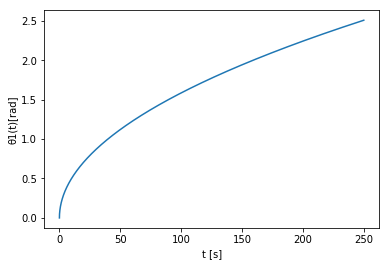

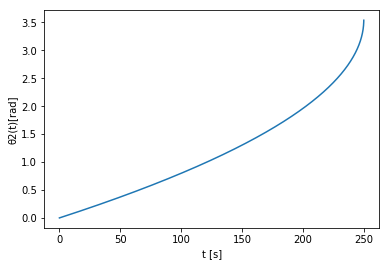

In [0]:

import numpy as np
import matplotlib.pyplot as plt
"""
4次のルンゲ-クッタ法による1階常微分方程式
The fourth-order Runge-Kutta method for the 1st order ordinary differencial equation

dθ/dt =v/(b/pi*θ+2r0) を解く

v[m/s]
l[m]
r0[m]
b[m]

"""

v=float(input("v[m/s]:?"))
l=float(input("l[m]:?"))
r0=float(input("r0[m]:?"))
b=float(input("b[m]:?"))
"""
v=2
l=10
r0=0.01
b=0.0005
"""


def f(x,t):
    return v/(b/np.pi*x+(2*r0))
  
def f2(x,t):
    return v/(np.sqrt((b*l/np.pi)+r0*r0)-b/2/np.pi*x)
  
a = 0
b = l/v
N = 300000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
xpoints2 = []
x = 0
x2 = 0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1, t+0.5*h)
    k3 = h*f(x+0.5*k2, t+0.5*h)
    k4 = h*f(x+k3, t+h)
    x += (k1+2*k2+2*k3+k4)/6
    xpoints2.append(x2)
    k1 = h*f2(x2,t)
    k2 = h*f2(x2+0.5*k1, t+0.5*h)
    k3 = h*f2(x2+0.5*k2, t+0.5*h)
    k4 = h*f2(x2+k3, t+h)
    x2 += (k1+2*k2+2*k3+k4)/6

print("リール巻き取り時間:"+str(b)+"[s]")    
    
plt.plot (tpoints[:len(xpoints)], xpoints)
plt.xlabel("t [s]")
plt.ylabel("θ1(t)[rad]")
plt.show()

plt.plot (tpoints[:len(xpoints)], xpoints2)
plt.xlabel("t [s]")
plt.ylabel("θ2(t)[rad]")
plt.show()

# 最高速での巻き取り

最大効率のトルクで回す。->$T(t)=T_{max}$(定数)

[DCモータの特性](https://ednjapan.com/edn/articles/1605/25/news042.html)



トルクが定数→回転数[rpm],角速度も定数

>$\frac{d\theta(t)}{dt}=\Omega$・・・(8)


半径が大きい方のリールについては

$r_1\omega_1=r_2\omega_2$より

$\omega_1=\frac{r_2}{r_1}\omega_2$

$\omega_1=\frac{\sqrt{\frac{bl}{\pi}+r_0^2}-\frac{b}{\pi}\theta_2}{\frac{b}{\pi}\theta_1+r_0}\omega_2$

同様に

$\omega_2=\frac{\frac{b}{\pi}\theta_1+r_0}{\sqrt{\frac{bl}{\pi}+r_0^2}-\frac{b}{\pi}\theta_2}\omega_1$

----
(5)式より
$\theta(t)=\frac{2\pi}{b}(\sqrt{\frac{b}{\pi}x(t)+r_0^2}-r_0)$



$\theta=\frac{2\pi}{b}(\sqrt{\frac{bl}{2\pi}+r_0^2}-r_0)$を境に、r1とr2の大きさが変わる

## ルンゲクッタ法による 𝜃(𝑡)の変化

リール巻き取り時間:10.8245[s]


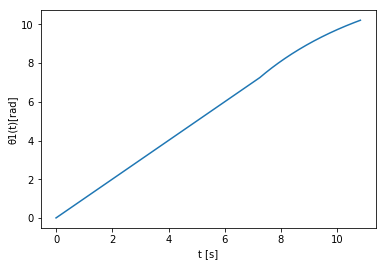

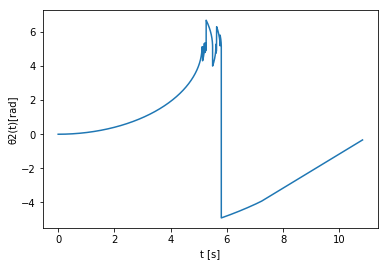

In [0]:


import numpy as np
import matplotlib.pyplot as plt
"""
4次のルンゲ-クッタ法による1階常微分方程式
The fourth-order Runge-Kutta method for the 1st order ordinary differencial equation

l[m]テープ全長
r0[m]リール初期半径
b[m]テープ厚み
Ω[rad/s]最大効率となるときの角速度

"""
"""
l=float(input("l[m]:?"))
r0=float(input("r0[m]:?"))
b=float(input("b[m]:?"))

omega=float(input("Ω[rad/s]:?"))
"""
def f1(x1,x2,t):
    return omega*(b/np.pi*x1+r0)/(np.sqrt(b*l/np.pi+r0*r0)-b/np.pi*x2)
  
def f3(x1,x2,t):
    return omega*(np.sqrt(b*l/np.pi+r0*r0)-b/np.pi*x2)/(b/np.pi*x1+r0)


l=250
r0=0.016
b=0.00002
omega=1


a = 0
b = 30
N = 60000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
xpoints2 = []
x1 = 0
x2 = 0
for t in tpoints:
  time=t
  if x1<2*np.pi/b*np.sqrt(b*l/2/np.pi+r0*r0)-r0:
    xpoints.append(x1)
    xpoints2.append(x2)
    k1 = h*f1(x1,x2,t)
    k2 = h*f1(x1,x2+0.5*k1, t+0.5*h)
    k3 = h*f1(x1,x2+0.5*k2, t+0.5*h)
    k4 = h*f1(x1,x2+k3, t+h)
    x1+= h*omega
    x2 += (k1+2*k2+2*k3+k4)/6
  elif x1<2*np.pi/b*np.sqrt(b*l/np.pi+r0*r0)-r0:
    xpoints.append(x1)
    xpoints2.append(x2)
    k1 = h*f3(x1,x2,t)
    k2 = h*f3(x1+0.5*k1,x2, t+0.5*h)
    k3 = h*f3(x1+0.5*k2,x2, t+0.5*h)
    k4 = h*f3(x1+k3,x2, t+h)
    x2+= h*omega
    x1+= (k1+2*k2+2*k3+k4)/6
  else:
    break

print("リール巻き取り時間:"+str(time)+"[s]")    
    
plt.plot (tpoints[:len(xpoints)], xpoints)
plt.xlabel("t [s]")
plt.ylabel("θ1(t)[rad]")
plt.show()

plt.plot (tpoints[:len(xpoints)], xpoints2)
plt.xlabel("t [s]")
plt.ylabel("θ2(t)[rad]")
plt.show()